# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#from tensorflow.keras.datasets import cifar10
from art.utils import load_cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

2023-08-20 15:17:44.496141: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 15:17:44.537808: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-20 15:17:44.538508: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-20 15:17:45.129863: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Load Dataset

In [2]:
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_cifar10()

In [14]:
x_train = x_train[:2000]
y_train = y_train[:2000]

x_test = x_test[:500]
y_test = y_test[:500]

In [15]:
print(min_pixel_value)
print(max_pixel_value)

0.0
1.0


In [16]:
#x_train = x_train.astype("float32") / 255
#x_test = x_test.astype("float32") / 255

In [17]:
#y_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)

# Model

In [18]:
my_model = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    
    Dense(512, activation="relu"),
    Dense(10, activation="softmax")
])

In [19]:
my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

# Train

In [21]:
from art.attacks.evasion import AdversarialPatch
from art.estimators.classification import KerasClassifier
tf.compat.v1.disable_eager_execution()

In [22]:
classifier = KerasClassifier(model=my_model, clip_values=(min_pixel_value, max_pixel_value))
classifier.fit(x_train, y_train, nb_epochs=10, batch_size=128)

Train on 2000 samples
Epoch 1/10


2023-08-20 15:18:19.941005: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-08-20 15:18:19.966387: W tensorflow/c/c_api.cc:300] Operation '{name:'training/Adam/conv2d_5/bias/v/Assign' id:505 op device:{requested: '', assigned: ''} def:{{{node training/Adam/conv2d_5/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training/Adam/conv2d_5/bias/v, training/Adam/conv2d_5/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


2000/2000 [==============================] - 2s 1ms/sample - loss: 2.1912 - accuracy: 0.1635
Epoch 2/10
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.9035 - accuracy: 0.3045
Epoch 3/10
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.6975 - accuracy: 0.3795
Epoch 4/10
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.5715 - accuracy: 0.4310
Epoch 5/10
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.4194 - accuracy: 0.4845
Epoch 6/10
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.3335 - accuracy: 0.5200
Epoch 7/10
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.2449 - accuracy: 0.5465
Epoch 8/10
2000/2000 [==============================] - 2s 1ms/sample - loss: 1.1548 - accuracy: 0.5835
Epoch 9/10
2000/2000 [==============================] - 3s 1ms/sample - loss: 0.9985 - accuracy: 0.6540
Epoch 10/10
2000/2000 [==============================] - 2s 1ms/sample - lo

In [23]:
y_pred = classifier.predict(x_test)

/home/alper/.local/lib/python3.10/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-08-20 15:18:44.671752: W tensorflow/c/c_api.cc:300] Operation '{name:'dense_3/Softmax' id:152 op device:{requested: '', assigned: ''} def:{{{node dense_3/Softmax}} = Softmax[T=DT_FLOAT, _has_manual_control_dependencies=true](dense_3/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


In [24]:
def calc_accuracy(preds):
    acc = np.sum(np.argmax(preds, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
    return acc

In [25]:
accuracy = calc_accuracy(y_pred)

In [26]:
print(f"Accuracy before attack: {accuracy * 100: .2f}%")

Accuracy before attack:  40.60%


# Attack

In [27]:
from art.attacks.evasion import DeepFool
import matplotlib.pyplot as plt

In [28]:
deep_fool = DeepFool(classifier)

In [29]:
x_test_adversarial = deep_fool.generate(x_test)

DeepFool:   0%|          | 0/500 [00:00<?, ?it/s]

In [30]:
adv_pred = classifier.predict(x_test_adversarial)

In [32]:
adv_accuracy = calc_accuracy(adv_pred)

In [33]:
print(f"Accuracy after attack: {adv_accuracy * 100: .2f}%")

Accuracy after attack:  25.40%


In [39]:
- (40.6 - 25.4)

-15.200000000000003

In [35]:
labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

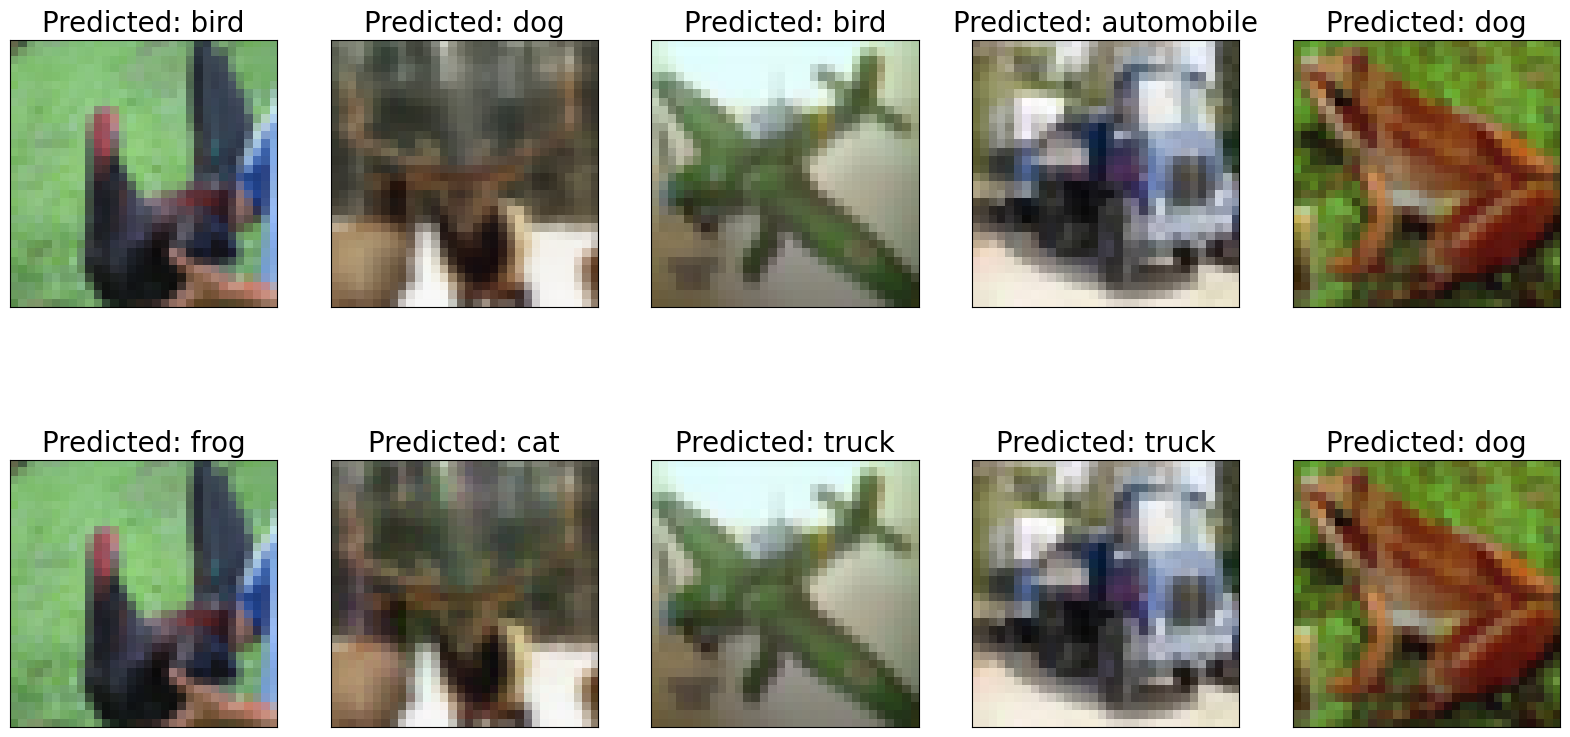

In [36]:
plt.figure(figsize=(20, 10))

for i in range(5):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i+25, :, :, :], cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Predicted: {labels.get(y_pred[i+25].argmax())}", fontsize=20)
    
    ax = plt.subplot(2, 5, i+1+5)
    plt.imshow(x_test_adversarial[i+25,:,:,:], cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(f"Predicted: {labels.get(adv_pred[i+25].argmax())}", fontsize=20)
    
plt.show()

In [12]:
import sys
print(sys.getrecursionlimit())

3000
